In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data_file=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')

##### In this project, I will use regression techniques to predict happiness scores by considering all relevant factors. By analyzing the relationships between these factors and happiness scores, the aim is to develop a model that can accurately predict happiness scores based on the given set of predictors, facilitating a deeper understanding of the determinants of happiness

### Performing Explotary Data Analysis

In [6]:
#Showing the first 5 rows
data_file.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
#Showing the shape of dataFrame
data_file.shape

(158, 12)

##### This dataset Containes 158 rows and 12 columns 
The Columns name are Country,Region,Happiness Rank,Happiness Score,Standard Error	Economy (GDP per Capita),Family	Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity and Dystopia Residual

In [8]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

##### From above we can notice that 
- There is no null value present
- Country and Region columns have an data type object
- Happiness Score columns have an data type int
- All othere columns have an data type float 

In [9]:
#Showing the unique value count of columns Country, Region and Happiness Rank
list=['Country','Region','Happiness Rank']
for i in list:
    unique_count=data_file[i].nunique()
    print(i,"=>",unique_count)

Country => 158
Region => 10
Happiness Rank => 157


In [10]:
#Showing and sorting the unique value of columns Country, Region and Happiness Rank 
for i in list:
    unique_value=sorted(data_file[i].unique())
    print(i,'=>',unique_value)

Country => ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg'

In [11]:
#checking number of duplicate values in happiness Rank columns
data_file['Happiness Rank'].duplicated().sum()

1

In [12]:
duplicate_value=data_file[data_file['Happiness Rank'].duplicated()]
duplicate_value

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.1826,0.14296,0.1614,2.10017


In [13]:
filtered_data = data_file[data_file['Happiness Rank'] == 82]
happiness_ranks = filtered_data['Happiness Rank'].tolist()
print("Happiness Ranks with value 82:", happiness_ranks)

Happiness Ranks with value 82: [82, 82]


- From above, we observe that there are 158 unique values in the 'Country' column, 10 unique values in the 'Region' column, but only 157 unique values in the 'Happiness Rank' column instead of 158.
- This indicates that two countries share the same rank.
- 82 Rank hold two contries 

In [14]:
data_file.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [15]:
#Showing the statistical summary
data_file.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From above statistical summary we can observe that
- Mean is less than meadian(50% percentile) of column economy,family,health,freedom which means that data is left skewed
- Mean is greater than meadian(50% percentile) of column trust and generosity which means that data is right skewed
- There is little bite difference between 75% percentile and max values which means that outliers are present in data

### Finding the relationship between the target variable and all other variables

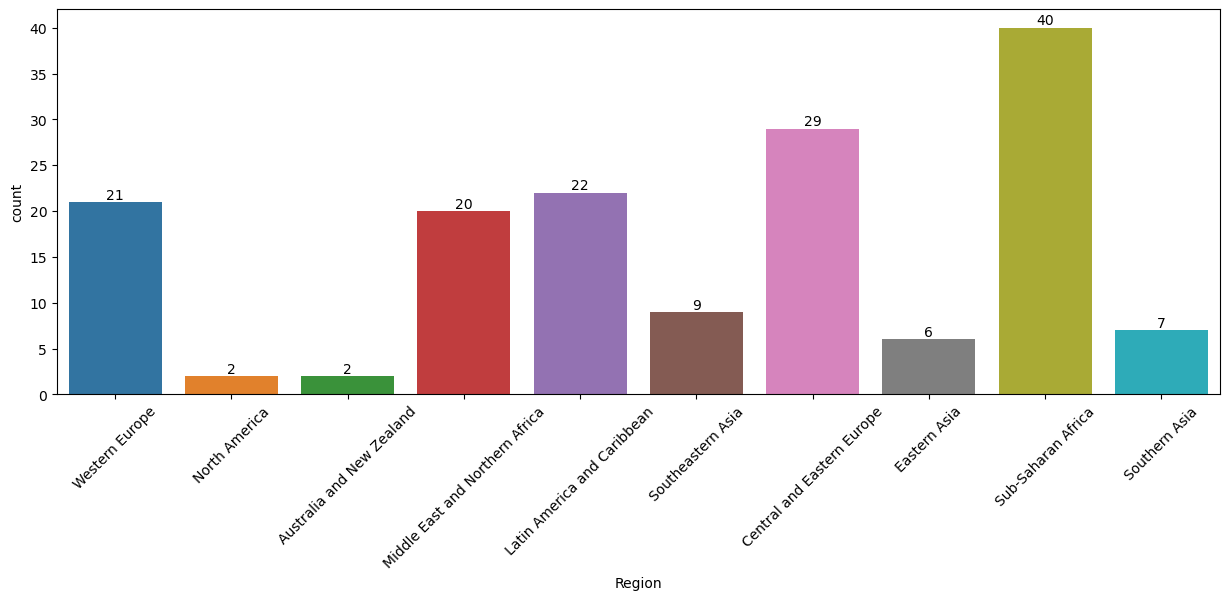

In [16]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Region',data=data_file)
for bars in ax.containers:
    ax.bar_label(bars)
    plt.xticks(rotation=45)

<Figure size 640x480 with 0 Axes>

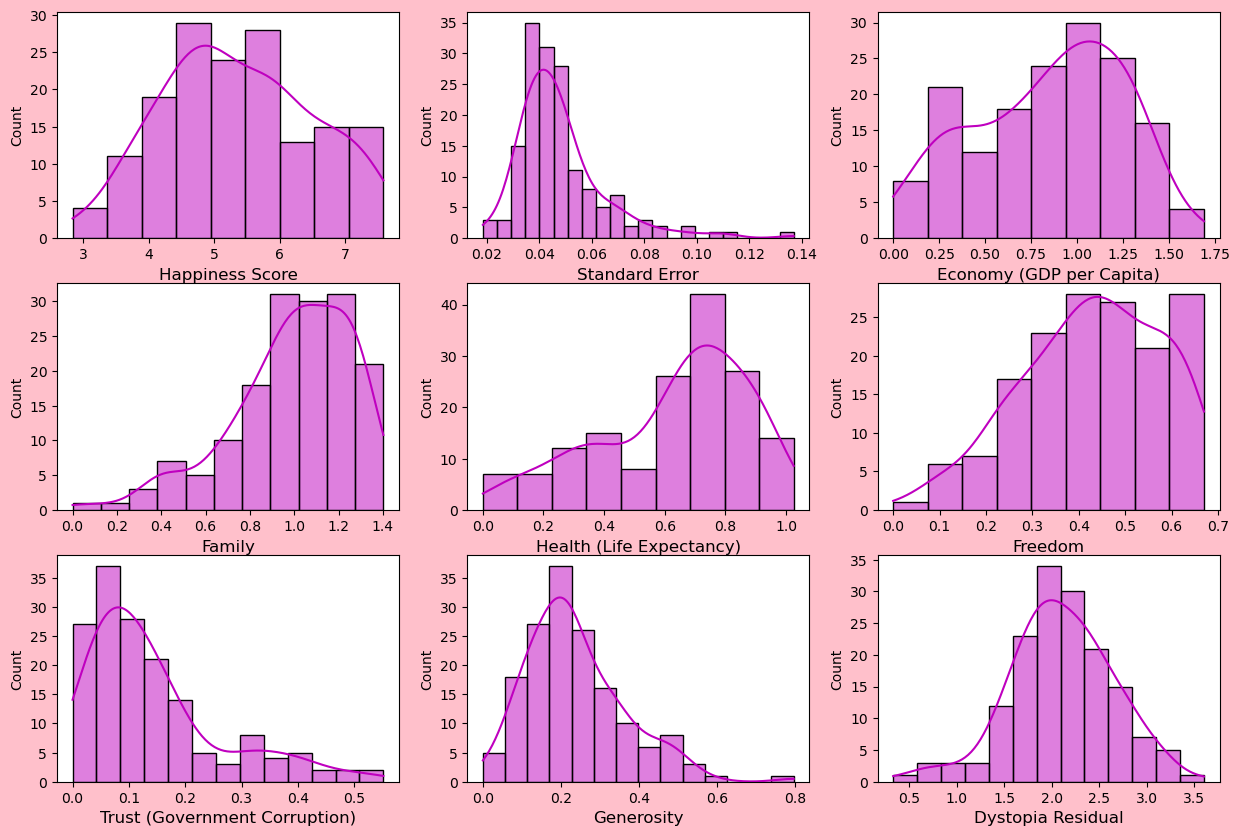

In [17]:
def plot_histplot(data):
    fig,axes=plt.subplots(3,3,figsize=(15,10),facecolor='pink')
    axes=axes.flatten()
    for i,feature in enumerate(data_file.columns[3:]):
        ax=axes[i]
        sns.histplot(data[feature],color='m',kde=True,ax=ax)
        axes[i].set_xlabel(feature,fontsize=12)
    plt.show()
plt.tight_layout()
plot_histplot(data_file)

##### The following columns—
##### 1.GDP per Capita,
#####  2.Family,
#####  3.Life Expectancy, 
##### 4.Freedom, 
##### 5.Generosity,
##### 6.Trust in Government Corruption—contribute to evaluating the happiness in each country.

In [18]:
# Drop the specified columns
data_file.drop(['Country', 'Region', 'Happiness Rank','Standard Error','Dystopia Residual'], axis=1, inplace=True)

# Calculate the number of data points lost
data_lost = data_file.shape[0] * 5  # Number of rows multiplied by the number of columns dropped

print("Number of data points lost after dropping columns:", data_lost)

Number of data points lost after dropping columns: 790


In [19]:
data_file.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [20]:
data_file.shape  

(158, 7)

##### After drpoing columns in dataset 
##### rows=158 and columns=7

### Visualization

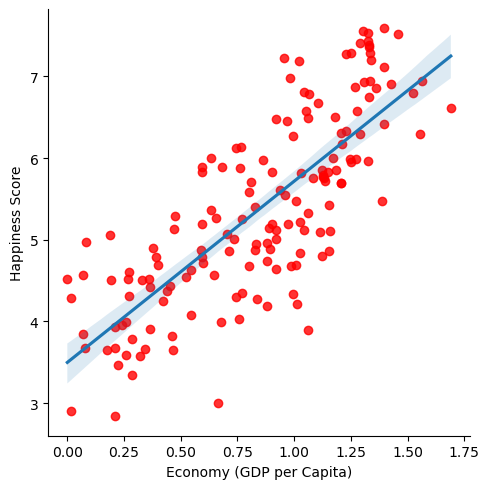

In [21]:
sns.lmplot(x='Economy (GDP per Capita)', y='Happiness Score', data=data_file, palette='deep', scatter_kws={'color': 'red'})

##### Economy(GDP per capital) has positive correlation with Happiness Score

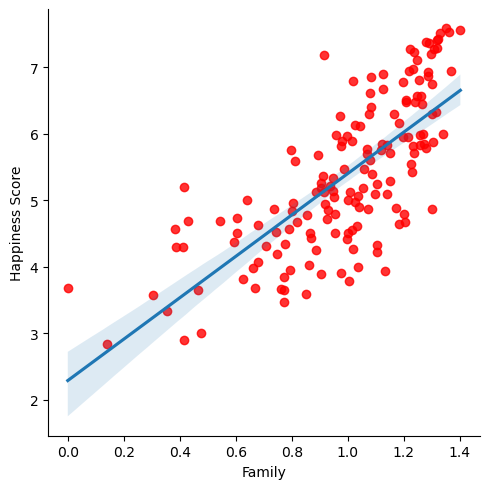

In [22]:
sns.lmplot(x='Family',y='Happiness Score',data=data_file,palette='deep',scatter_kws={'color':'red'})

##### Family has positive correlation with Happiness Score

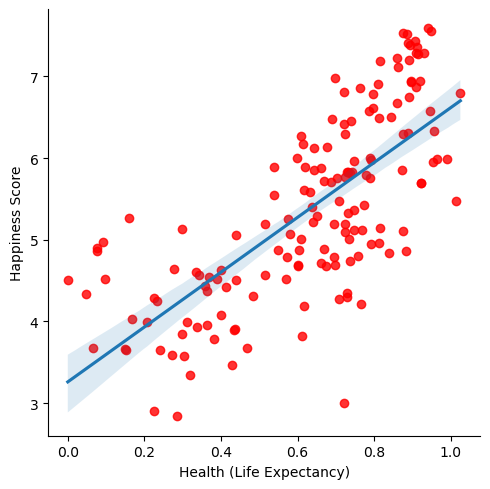

In [23]:
sns.lmplot(x='Health (Life Expectancy)',y='Happiness Score',data=data_file,palette='deep',scatter_kws={'color':'red'})

##### Health(Life Expectancy) has positive correlation with Happiness Score

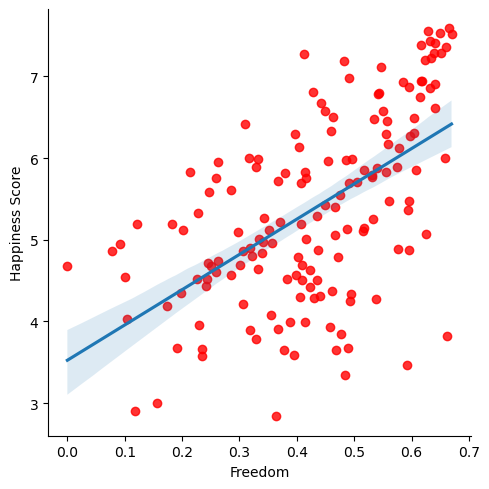

In [24]:
sns.lmplot(x='Freedom',y='Happiness Score',data=data_file,palette='deep',scatter_kws={'color':'red'})

##### Freedom has positive correlation with Happiness Score(Not a perfect correlation)

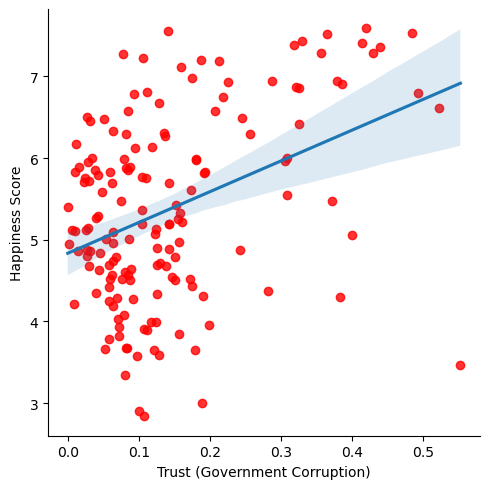

In [25]:
sns.lmplot(x='Trust (Government Corruption)',y='Happiness Score',data=data_file,palette='deep',scatter_kws={'color':'red'})

##### Trust(Government Corruption) has positive correlation with Happiness Score(Not a perfect correlation)

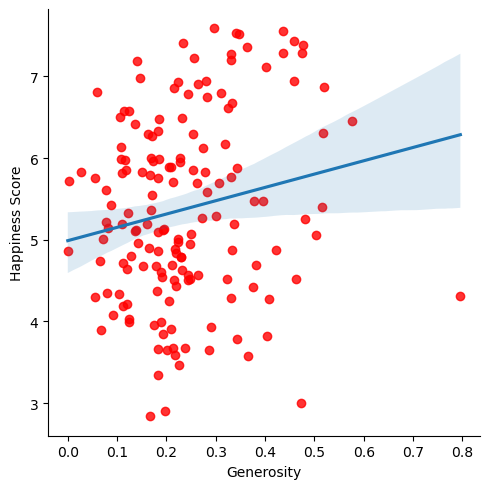

In [26]:
sns.lmplot(x='Generosity',y='Happiness Score',data=data_file,palette='deep',scatter_kws={'color':'red'})

##### Generosity has relation with Happiness Score(Not a high correlation)

In [27]:
#checking correlaation matrix
corr_matrix=data_file.corr()
corr_matrix

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
Economy (GDP per Capita),0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


### Checking The Outliers

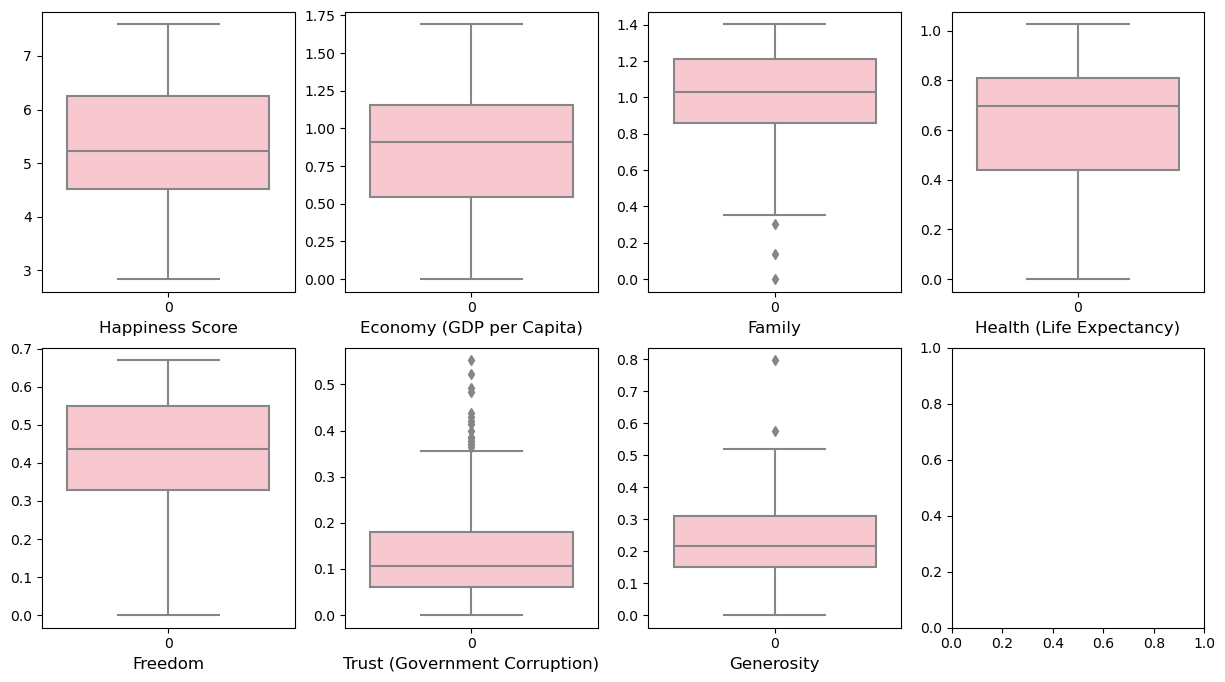

In [28]:
def plot_box(data):
    fig ,axes=plt.subplots(2,4,figsize=(15,8))
    axes=axes.flatten()
    for i,feature in enumerate(data.columns):
        ax=axes[i]
        sns.boxplot(data[feature],color='pink',ax=ax)
        ax.set_xlabel(feature,fontsize=12)
    plt.tight_layout
    plt.show()
plot_box(data_file)

In [29]:
#Removing outliers
from scipy.stats import zscore
feature=data_file.iloc[:,1:]
z=np.abs(zscore(feature))
np.where(z>3)
data_file=data_file[(z<3).all(axis=1)]

### Now checking the data has been distributed in each column¶

In [30]:
data_file.skew()

Happiness Score                  0.133600
Economy (GDP per Capita)        -0.392269
Family                          -0.803145
Health (Life Expectancy)        -0.741582
Freedom                         -0.397454
Trust (Government Corruption)    1.280533
Generosity                       0.636850
dtype: float64

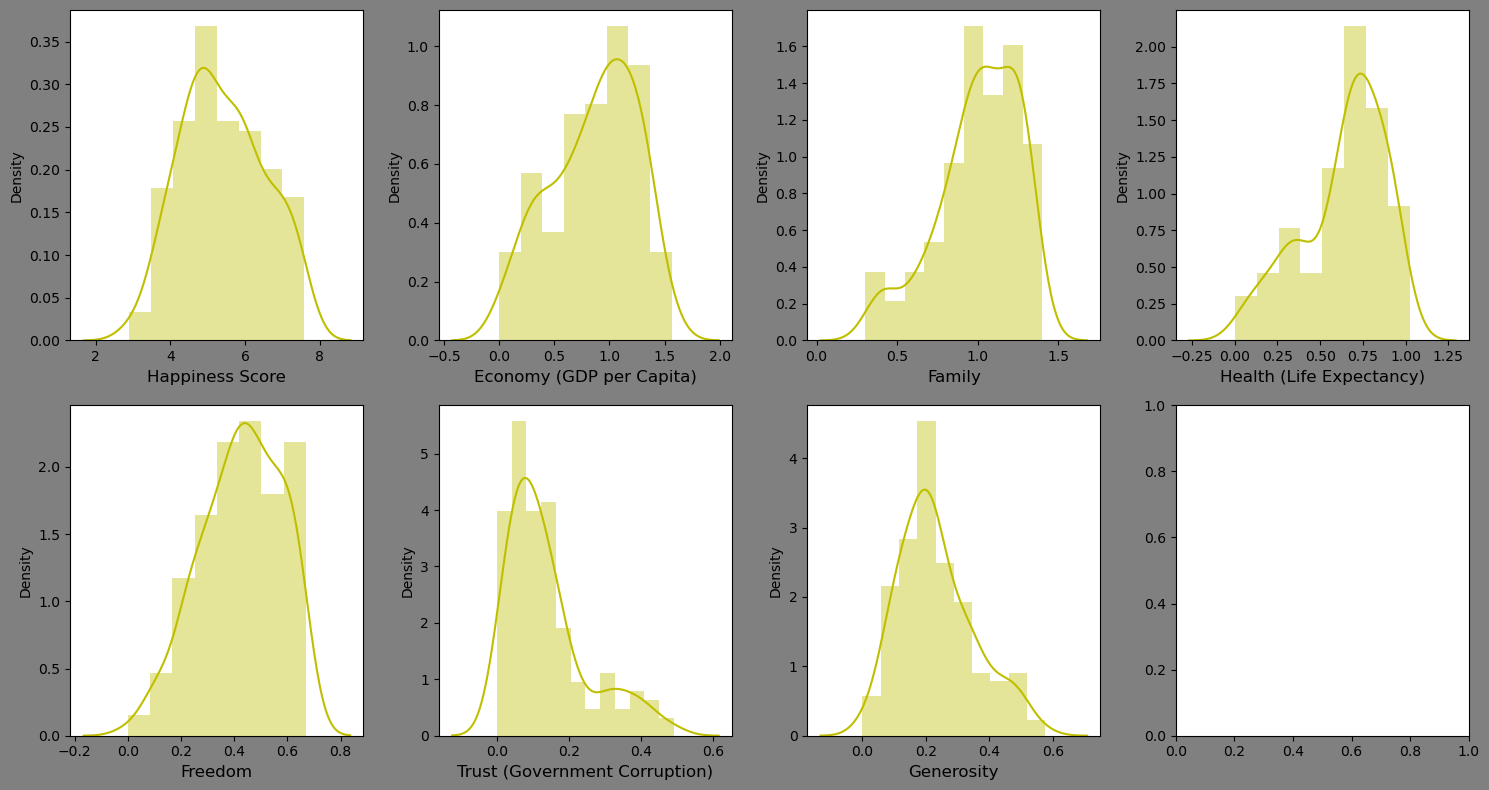

In [31]:
def plot_displot(data):
    fig,axis=plt.subplots(2,4,figsize=(15,8), facecolor='grey')
    axis=axis.flatten()
    for i ,feature in enumerate(data.columns):
        ax=axis[i]
        sns.distplot(data[feature],ax=ax,color='y')
        ax.set_xlabel(feature,fontsize=12)
    plt.tight_layout()    
    plt.show()    
plot_displot(data_file)

In [32]:
#Removing Skewness using cuberoot method
data_file['Trust (Government Corruption)']=np.cbrt(data_file['Trust (Government Corruption)'])

In [33]:
data_file.skew()

Happiness Score                  0.133600
Economy (GDP per Capita)        -0.392269
Family                          -0.803145
Health (Life Expectancy)        -0.741582
Freedom                         -0.397454
Trust (Government Corruption)   -0.055171
Generosity                       0.636850
dtype: float64

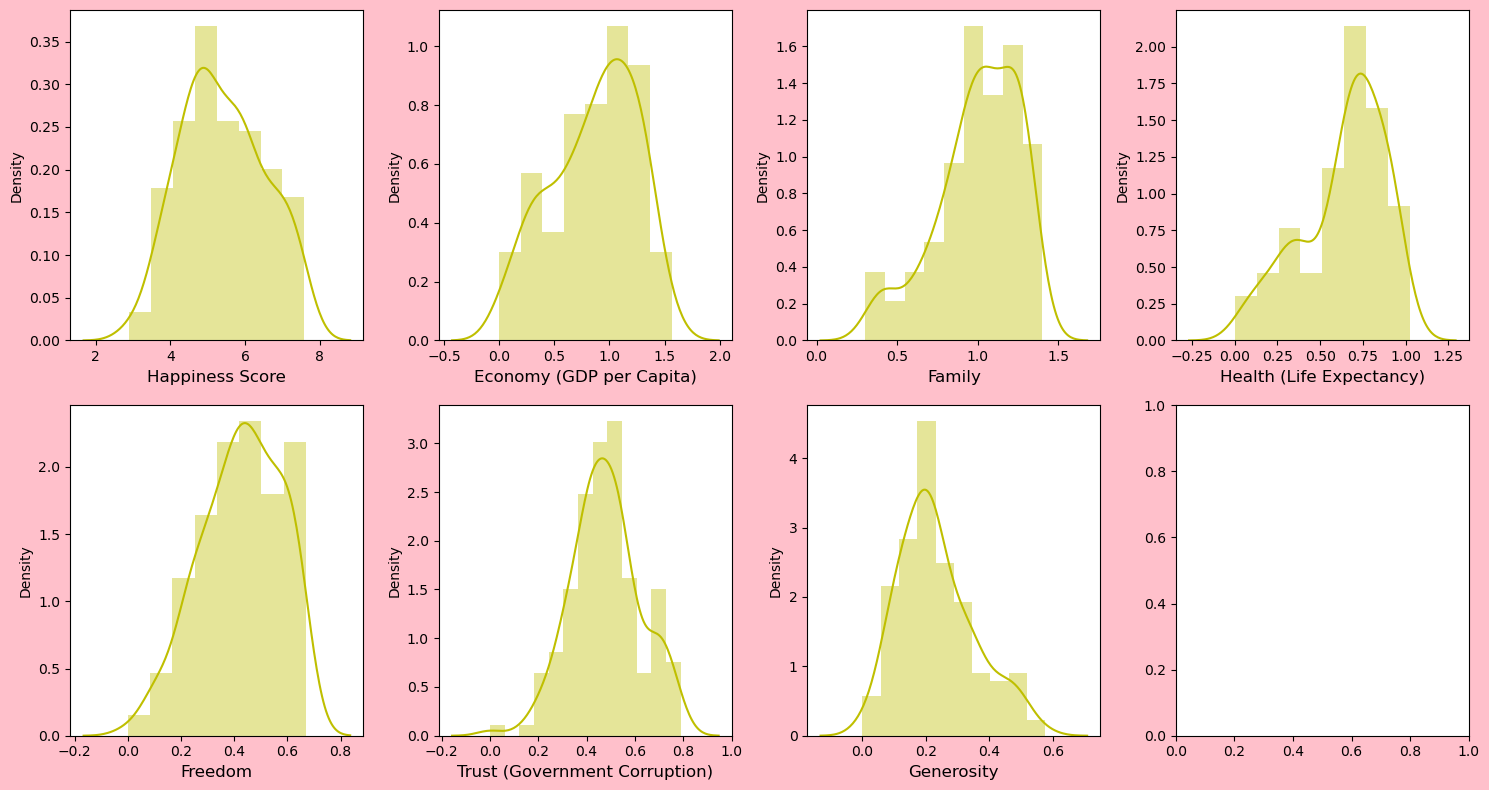

In [34]:
def plot_displot(data):
    fig,axis=plt.subplots(2,4,figsize=(15,8), facecolor='pink')
    axis=axis.flatten()
    for i ,feature in enumerate(data.columns):
        ax=axis[i]
        sns.distplot(data[feature],ax=ax,color='y')
        ax.set_xlabel(feature,fontsize=12)
    plt.tight_layout()    
    plt.show()    
plot_displot(data_file)

From the above distribution plot we can notice that the data almost looks normal in all columns except family and health  

### Splitting data into training and test

In [35]:
x=data_file.iloc[:,1:]
y=data_file.iloc[:,0]
print('Feature Dimension',x.shape)
print('Label Dimension',y.shape)

Feature Dimension (153, 6)
Label Dimension (153,)


### Feature scaling using MinMaxScaler

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scale = MinMaxScaler()

# Fit the scaler to your data and transform it
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0.892961,0.952046,0.918244,0.993789,0.948395,0.514975
1,0.832733,1.000000,0.924496,0.938841,0.659958,0.757071
2,0.847542,0.962115,0.853099,0.969615,0.994188,0.592382
3,0.932918,0.935163,0.863409,1.000000,0.905229,0.602100
4,0.848060,0.927577,0.883326,0.945112,0.874913,0.794916
...,...,...,...,...,...,...
148,0.165048,0.499400,0.264570,0.589685,0.638872,0.377356
149,0.204500,0.000000,0.295879,0.349604,0.582357,0.633524
150,0.183291,0.046399,0.311241,0.723426,0.546001,0.316849
151,0.424065,0.156488,0.704150,0.234184,0.726968,0.818653


We have scaled the data using minmax scalarization method  overcome the issue of biasness

### Model Selection

In [37]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [38]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum R2_Score is=>",max_accuracy,"On Random State=>",best_state)


Maximum R2_Score is=> 0.8542092855769071 On Random State=> 50


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=best_state)

#### LinearRegression

In [40]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
accuracy_lr=r2_score(y_test,pred_lr)
print('Accuracy',accuracy_lr*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lr)))

Accuracy 85.42092855769071
Mean Absolute Error 0.32036411542738125
Mean Squared Error 0.18723054434110734
Root Mean Squared Error 0.4327014494326398


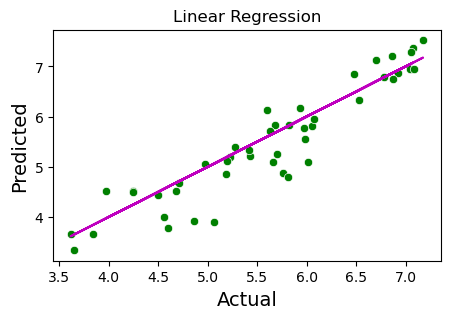

In [41]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_lr,y=y_test,color='g')
plt.plot(pred_lr,pred_lr,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=12)
plt.show()

#### Random Forest Regressor

In [42]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_rfr=RFR.predict(x_test)
accuracy_rfr=r2_score(y_test,pred_rfr)
print('R 2 Score',accuracy_rfr*100)
print('Mean Absolute Error',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error',mean_squared_error(y_test,pred_rfr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R 2 Score 75.33788940115048
Mean Absolute Error 0.44627413043478315
Mean Squared Error 0.3167211581543487
Root Mean Squared Error 0.5627798487458028


### Lasso

In [43]:
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
accuracy_ls=r2_score(y_test,pred_ls)
print('R2 Score:',accuracy_ls*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

R2 Score: -0.4250191187336716
Mean Absolute Error: 0.9468086143843967
Mean Squared Error: 1.289700175314343
Root Mean Squared Error: 1.1356496710316712


#### Ridge Regressor

In [44]:
rg=Ridge()
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
accuracy_rg=r2_score(y_test,pred_rg)
print('R2 Score:',accuracy_rg*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_rg))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rg))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_rg)))

R2 Score: 84.84071475749771
Mean Absolute Error: 0.3287358022110903
Mean Squared Error: 0.19468189308263958
Root Mean Squared Error: 0.4412277111454352


#### K-Neighbors Regressor

In [45]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
accuracy_knn=r2_score(y_test,pred_knn)
print('R2 Score:',accuracy_knn*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score: 82.21334431505602
Mean Absolute Error: 0.3600956521739129
Mean Squared Error: 0.22842368521739123
Root Mean Squared Error: 0.47793690505901637


#### ExtraTreesRegressor

In [46]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
accuracy_etr=r2_score(y_test,pred_etr)
print('R2 Score:',accuracy_etr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score: 79.35621557145554
Mean Absolute Error: 0.4112489130434784
Mean Squared Error: 0.2651161297282611
Root Mean Squared Error: 0.5148942898578902


#### Support Vector Regressor

In [47]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
accuracy_svr=r2_score(y_test,pred_svr)
print('R2 Score:',accuracy_svr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_svr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score: 84.19788723308488
Mean Absolute Error: 0.34453416576282236
Mean Squared Error: 0.20293735350681819
Root Mean Squared Error: 0.4504856862396609


#### Decision Tree Regressor

In [48]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
accuracy_dtr=r2_score(y_test,pred_dtr)
print('R2 Score:',accuracy_dtr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score: 50.34644993225914
Mean Absolute Error: 0.6642608695652173
Mean Squared Error: 0.6376716956521739
Root Mean Squared Error: 0.7985434838831095


#### GradientBoostingRegressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor 
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
accuracy_gbr=r2_score(y_test,pred_GBR)
print('R2 Score:',accuracy_gbr*100)
print('Mean Absolute Error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2 Score: 73.32282432549717
Mean Absolute Error: 0.479140538198009
Mean Squared Error: 0.342599468202438
Root Mean Squared Error: 0.5853199707872934


### Cross Validation Score

In [50]:
from sklearn.model_selection import cross_val_score

#### LinearRegression

In [51]:
score=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_lr)-score.mean())*100)

[-6.64202173 -3.66899716 -5.87637507 -9.7413479  -4.47550795]
-6.080849962706236
Difference between R2 score and cross validation score is: 693.5059248283143


#### Random Forest Regressor

In [52]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_rfr)-score1.mean())*100)

[-11.93497263  -5.27052316  -5.83647325 -15.06678587  -7.56529417]
-9.134809815032591
Difference between R2 score and cross validation score is: 988.8188709044096


### Lasso

In [53]:
score2=cross_val_score(ls,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_ls)-score2.mean())*100)

[-39.29404218 -12.05842118  -0.36550509 -34.4219792  -24.69430366]
-22.16685026371225
Difference between R2 score and cross validation score is: 2216.2600072524915


#### Ridge Regressor

In [54]:
score2=cross_val_score(rg,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_rg)-score2.mean())*100)

[-8.32702605 -3.36333731 -5.13583023 -8.53588548 -5.18067733]
-6.108551277765129
Difference between R2 score and cross validation score is: 695.6958425340107


#### K-Neighbors Regressor

In [55]:
score4=cross_val_score(knn,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_knn)-score4.mean())*100)

[-14.3041302   -8.69043731  -8.17728314 -14.3040347   -6.27632866]
-10.350442799591432
Difference between R2 score and cross validation score is: 1117.2576242741993


#### ExtraTreesRegressor

In [56]:
score5=cross_val_score(etr,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_etr)-score5.mean())*100)

[-11.46724855  -6.61912374  -6.84034474 -13.44636998  -6.97865139]
-9.07034767739326
Difference between R2 score and cross validation score is: 986.3909833107815


#### Decision Tree Regressor

In [57]:
score6=cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_dtr)-score6.mean())*100)

[ -9.81861258 -13.07420105 -13.4834126  -29.78870618  -6.63465152]
-14.559916783000574
Difference between R2 score and cross validation score is: 1506.3381282323166


#### GradientBoostingRegressor

In [58]:
score7=cross_val_score(GBR,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is:',(r2_score(y_test,pred_GBR)-score7.mean())*100)

[-11.04622171  -5.99310523  -8.33864649 -20.34248417  -8.59719191]
-10.86352990319817
Difference between R2 score and cross validation score is: 1159.6758146453142


##### Based on these observations, the LinearRegressor seems to perform relatively well among the models tested, as it has a high mean cross- validation score and a small difference between accuracy score and cross-validation score

### Hyper Paramter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Define the hyperparameters you want to tune
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'positive': [True, False],        # Whether to enforce positivity of the coefficients
    'copy_X': [True, False],          # Whether to copy X before fitting
}

In [61]:
GCV=GridSearchCV(lr,param_grid,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [63]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': True}

In [64]:
best_model=LinearRegression(copy_X=True, fit_intercept=True, positive=True)
best_model.fit(x_train,y_train)
pred_LR=best_model.predict(x_test)
acc=r2_score(y_test,pred_LR)
print(acc*100)

85.42092855769071


#### By adding parameter my model give 85.42 % accuracy

Text(0.5, 1.0, 'LinearRegressor')

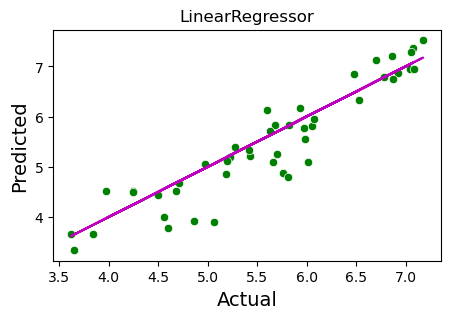

In [65]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=pred_LR,y=y_test,color='g')
plt.plot(pred_LR,pred_LR,color='m')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('LinearRegressor',fontsize=12)

### Saving the Model

In [66]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"World Happiness Report Project.pkl")

['World Happiness Report Project.pkl']

In [67]:
#Now loading file and checcking prediction 
model=joblib.load("World Happiness Report Project.pkl")

In [68]:
prediction=model.predict(x_test)
prediction

array([5.98151147, 5.42772922, 6.92230153, 7.04276717, 3.64710332,
       4.68625635, 3.97417363, 6.7861944 , 6.86686586, 5.82728066,
       5.93292297, 5.75850895, 6.53201823, 4.24409727, 6.05877013,
       6.86906008, 4.24358121, 4.56097721, 4.85830806, 5.22942696,
       5.27939859, 5.19552726, 6.70353082, 4.97707158, 4.49837094,
       5.18641104, 6.07878456, 5.97883487, 4.59598741, 3.61864286,
       5.68398961, 5.81484207, 5.70005183, 5.42064228, 6.47493103,
       7.17623676, 5.62969304, 5.06760989, 5.66432479, 7.07264923,
       5.59580282, 6.01285599, 4.70775613, 7.0588016 , 3.8466082 ,
       7.08326732])

In [69]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,5.548,5.981511
1,5.212,5.427729
2,6.867,6.922302
3,6.946,7.042767
4,3.340,3.647103


In [70]:
x_test.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
68,0.612868,0.840319,0.525589,0.710883,0.855800,0.294621
78,0.654699,0.577671,0.624677,0.552909,0.688561,0.135329
20,0.809746,0.893804,0.887032,0.890284,0.866965,0.900781
16,1.000000,0.833906,0.896308,0.919520,0.915810,0.486448
150,0.183291,0.046399,0.311241,0.723426,0.546001,0.316849


#### Sample Prediction

In [73]:
#taking some ramdom value for prediction
sample_data={'Economy (GDP per Capita)':[1,0.2,0.56,0.15,0.31],'Family':[0.021,0.152,0.080,0.625,0.0558],'Health (Life Expectancy)':[0.62,0.46,0.77,0.31,0.23],
             'Freedom':[0.46,0.71,0.55,0.89,0.09],'Trust (Government Corruption)':[0.003,0.514,0.102,0.120,0.876],
            'Generosity':[0.56,0.587,0.415,0.0021,0.214]}
sample_df=pd.DataFrame(sample_data)
sample_prediction=best_model.predict(sample_df)
for i, pred in enumerate(sample_prediction):
    print(f"Prediction for sample {i+1}: {pred:.2f}")

Prediction for sample 1: 4.37
Prediction for sample 2: 4.02
Prediction for sample 3: 4.25
Prediction for sample 4: 4.44
Prediction for sample 5: 3.46


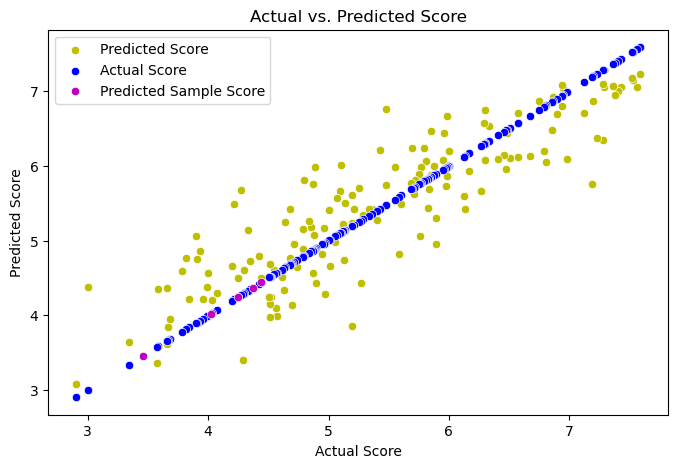

In [74]:
sample_df['predicted_score'] = sample_prediction
plt.figure(figsize=(8,5))
sns.scatterplot(x=y,y=best_model.predict(x),color='y',label='Predicted Score')
sns.scatterplot(x=y,y=y,color='b',label='Actual Score')
sns.scatterplot(x=sample_df['predicted_score'],y=sample_df['predicted_score'],color='m',label='Predicted Sample Score')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Score')
plt.legend()
plt.show()

##### Conclusively, in the analysis of  World Happiness Report data, I employed regression techniques within supervised learning, adhering to the exploratory data analysis (EDA) process. This included steps such as removing duplicate records, investigating the relationship between the target variable and independent variables, and visualizing the data through various graphs to discern patterns. Additionally, I addressed skewness and outliers  and further enhanced model performance through hyperparameter tuning. Ultimately, after splitting the data and evaluating multiple models, Linear Regression emerged as the best-performing model with 85.42% accuracy .